In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
gifts = pd.read_csv("gifts.csv")
gifts.head()

,code,city,name,price,star,review,link,img,desc
0,12033,小樽市,北海道ケーキ3本セット,10000,0,0,https://www.satofull.jp/products/detail.php?pr...,https://www.satofull.jp/upload/save_image/853/...,北海道産原料を使用した濃厚なケーキです。お好みの大きさにカットしてお召し上がりください。
1,12033,小樽市,紅ズワイまるごと海鮮鍋,10000,0,0,https://www.satofull.jp/products/detail.php?pr...,https://www.satofull.jp/upload/save_image/853/...,紅スワイガニをまるごと一尾入れた贅沢な紅ズワイまるごと海鮮鍋です。
2,12033,小樽市,石狩鍋,10000,0,0,https://www.satofull.jp/products/detail.php?pr...,https://www.satofull.jp/upload/save_image/853/...,古くから北海道民に親しまれてきた、鮭を使った石狩鍋をご自宅でお楽しみ頂けます。
3,12033,小樽市,いくら醤油漬け80g×6P,20000,0,0,https://www.satofull.jp/products/detail.php?pr...,https://www.satofull.jp/upload/save_image/853/...,こだわりの醤油だれで漬け込んだプチっと弾ける北海道いくら醤油漬け。
4,12033,小樽市,北海道スープカレーセット(2種類 計4個),10000,0,0,https://www.satofull.jp/products/detail.php?pr...,https://www.satofull.jp/upload/save_image/853/...,電子レンジで温めるだけですぐに食べられる本格スープカレーのセットです。


In [42]:
# ☆2.5などが25になっている
gifts.groupby("star").count()

,code,city,name,price,review,link,img,desc
star,,,,,,,,
0,7175,7175,7175,7175,7175,7175,7175,7175
1,17,17,17,17,17,17,17,17
2,20,20,20,20,20,20,20,20
3,49,49,49,49,49,49,49,49
4,277,277,277,277,277,277,277,277
5,751,751,751,751,751,751,751,751
25,5,5,5,5,5,5,5,5
35,30,30,30,30,30,30,30,30
45,273,273,273,273,273,273,273,273


In [44]:
# starの型がint64になっているのでfloatにする
gifts.dtypes

code       int64
city      object
name      object
price      int64
star       int64
review     int64
link      object
img       object
desc      object
dtype: object

In [46]:
gifts["star"] = gifts["star"].astype("float")
gifts.dtypes

code        int64
city       object
name       object
price       int64
star      float64
review      int64
link       object
img        object
desc       object
dtype: object

In [47]:
# スター数を修正
targets = list(gifts[gifts["star"] > 10].index)
for i in targets :
    if gifts["star"][i] > 40:
        gifts["star"][i] = 4.5
    elif gifts["star"][i] > 30:
        gifts["star"][i] = 3.5
    else :
        gifts["star"][i] = 2.5
gifts.groupby("star").count()

<ipython-input-47-b807f323c837>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gifts["star"][i] = 4.5
<ipython-input-47-b807f323c837>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gifts["star"][i] = 3.5
<ipython-input-47-b807f323c837>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gifts["star"][i] = 2.5


,code,city,name,price,review,link,img,desc
star,,,,,,,,
0.0,7175,7175,7175,7175,7175,7175,7175,7175
1.0,17,17,17,17,17,17,17,17
2.0,20,20,20,20,20,20,20,20
2.5,5,5,5,5,5,5,5,5
3.0,49,49,49,49,49,49,49,49
3.5,30,30,30,30,30,30,30,30
4.0,277,277,277,277,277,277,277,277
4.5,273,273,273,273,273,273,273,273
5.0,751,751,751,751,751,751,751,751


In [56]:
gifts.groupby("code").count()["star"]

code
12033     10
12041     69
12050      1
12068     87
12076      9
          ..
465313     2
465321     1
472131     4
472140     5
473251     4
Name: star, Length: 669, dtype: int64

In [62]:
gifts[gifts["code"] == 12068].groupby("star").count()

,code,city,name,price,review,link,img,desc
star,,,,,,,,
0.0,77,77,77,77,77,77,77,77
2.0,1,1,1,1,1,1,1,1
3.0,2,2,2,2,2,2,2,2
3.5,1,1,1,1,1,1,1,1
4.0,4,4,4,4,4,4,4,4
4.5,2,2,2,2,2,2,2,2


In [63]:
gifts[gifts["code"] == 12041].groupby("star").count()

,code,city,name,price,review,link,img,desc
star,,,,,,,,
0.0,62,62,62,62,62,62,62,62
4.0,1,1,1,1,1,1,1,1
5.0,6,6,6,6,6,6,6,6


In [68]:
gifts.pivot_table(index="star",columns="review",aggfunc="size",fill_value=0)

review,0,1,2,3,4,5,6,7,8,9,...,273,305,324,348,358,387,523,540,563,730
star,,,,,,,,,,,,,,,,,,,,,
0.0,7175,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,0,15,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,17,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.5,0,0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,36,9,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3.5,0,0,9,10,6,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4.0,0,200,28,16,6,4,2,3,3,1,...,0,0,0,0,0,0,0,0,0,0
4.5,0,2,58,35,22,13,16,13,2,8,...,1,1,1,1,1,1,0,1,1,1
5.0,0,478,113,37,30,17,8,9,10,7,...,0,0,0,0,0,0,1,0,0,0


In [71]:
gifts[gifts["review"] == 730]

,code,city,name,price,star,review,link,img,desc
7177,402052,飯塚市,鉄板焼きハンバーグ(デミソース)20個セット,10000,4.5,730,https://www.satofull.jp/products/detail.php?pr...,https://www.satofull.jp/upload/save_image/187/...,粗挽きハンバーグにこだわりのデミソースをかけました。


<AxesSubplot:xlabel='star', ylabel='review'>

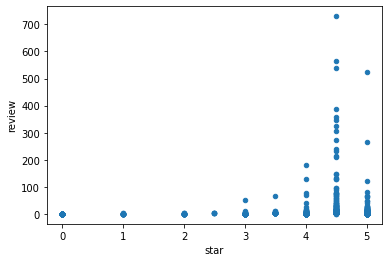

In [73]:
gifts.plot.scatter(x="star", y="review")

In [74]:
gifts.to_csv("gifts_star.csv",index=False)